In [1]:
import numpy as np #работа с многомерными массивами
import pandas as pd #работа с числовыми таблицами и временными рядами
import matplotlib.pyplot as plt #визуализация (графики)
import scipy #пакет прикладных математических процедур
import scipy.stats as stats #статистические функции/критерии
import seaborn as sns #статистические графики
import math #математические операции с числами

df = pd.read_csv('heart.csv',sep=',')
df.sample(5)

,Age,Gender,BloodPressure,Cholesterol,HeartRate,QuantumPatternFeature,HeartDisease
341,56,0,179,176,66,9.116763,0
436,66,0,105,276,98,9.159122,0
286,38,0,161,161,119,8.121840,1
178,49,1,124,152,107,8.889693,0
105,53,0,110,265,71,8.319011,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    500 non-null    int64  
 1   Gender                 500 non-null    int64  
 2   BloodPressure          500 non-null    int64  
 3   Cholesterol            500 non-null    int64  
 4   HeartRate              500 non-null    int64  
 5   QuantumPatternFeature  500 non-null    float64
 6   HeartDisease           500 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 27.5 KB


# **Описание датасета**
* Age - возраст пациента в годах  *  Gender- 0 (женский), 1 (мужской)
*  BloodPressur- уровень артериального давления
*  Cholesterl- уровень холестерина
*  HeartR- частота сердечных сокращений в ударах в минуту
*  QuantumPatternFea- пользовательская характеристика, позволяющая выбрать наиболее эффективную модель.
*  HeartDi- 0 (без заболевания сердца), 1 (с заболеванием сердца)in
# **Типы данных в наборе**
*   Количественный (непрерывный): все признаки являются типом int, кроме признака QuantumPatternFeature - floatnt64(6)

In [3]:
df.describe()

,Age,Gender,BloodPressure,Cholesterol,HeartRate,QuantumPatternFeature,HeartDisease
count,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000
mean,54.864000,0.468000,132.874000,221.50000,88.766000,8.317407,0.600000
std,14.315004,0.499475,26.418516,43.86363,17.417289,0.919629,0.490389
min,30.000000,0.000000,90.000000,150.00000,60.000000,6.164692,0.000000
25%,43.000000,0.000000,111.000000,183.75000,73.000000,7.675779,0.000000
50%,55.000000,0.000000,132.000000,221.00000,89.000000,8.323064,1.000000
75%,66.250000,1.000000,155.000000,258.00000,104.000000,8.935999,1.000000
max,79.000000,1.000000,179.000000,299.00000,119.000000,10.784886,1.000000


**Вывод:** В ходе анализа не обнаружены странные значения.

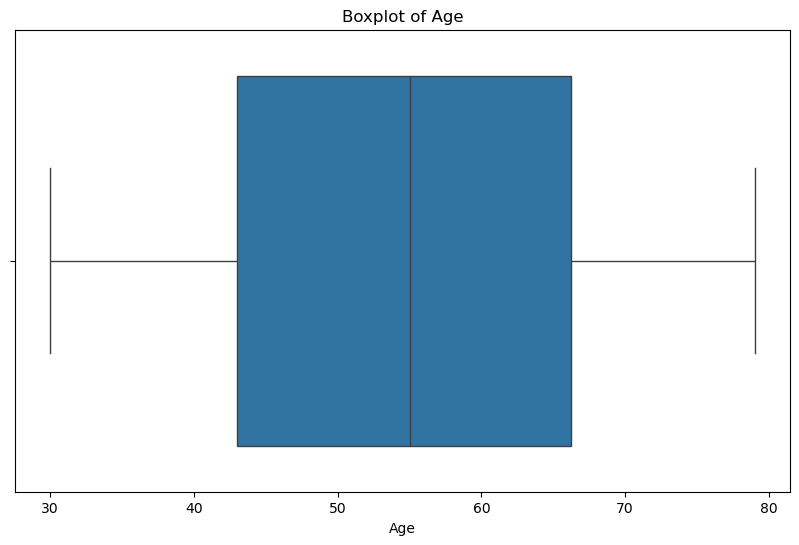

In [4]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Age'])
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.show()

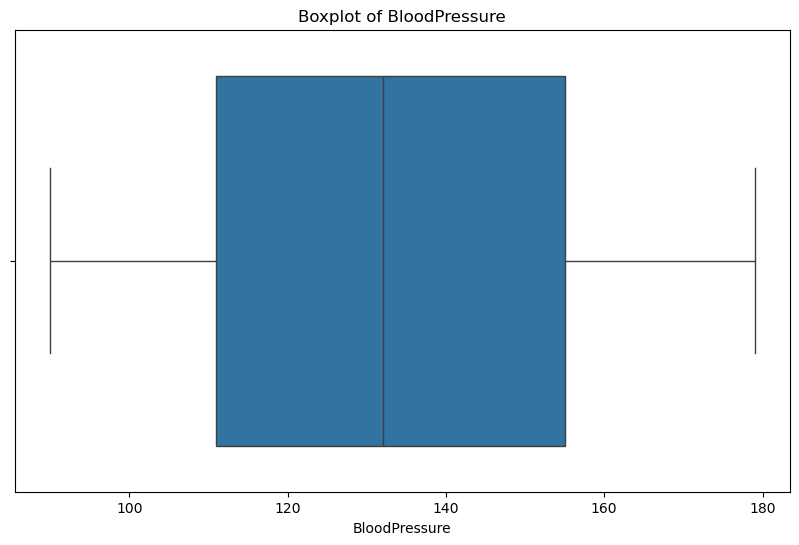

In [5]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['BloodPressure'])
plt.title('Boxplot of BloodPressure')
plt.xlabel('BloodPressure')
plt.show()

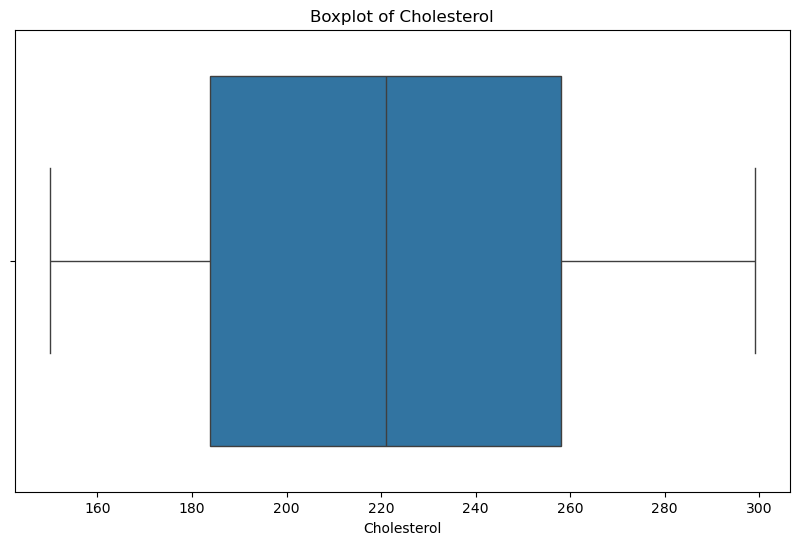

In [6]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Cholesterol'])
plt.title('Boxplot of Cholesterol')
plt.xlabel('Cholesterol')
plt.show()

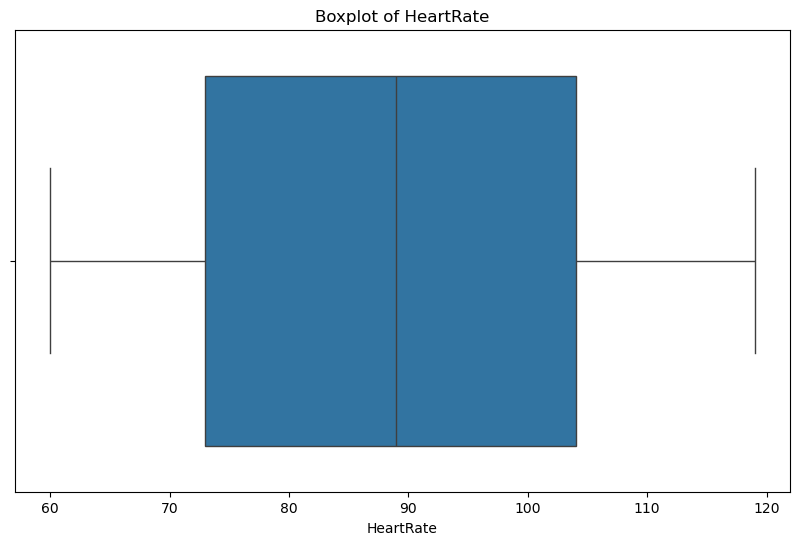

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['HeartRate'])
plt.title('Boxplot of HeartRate')
plt.xlabel('HeartRate')
plt.show()

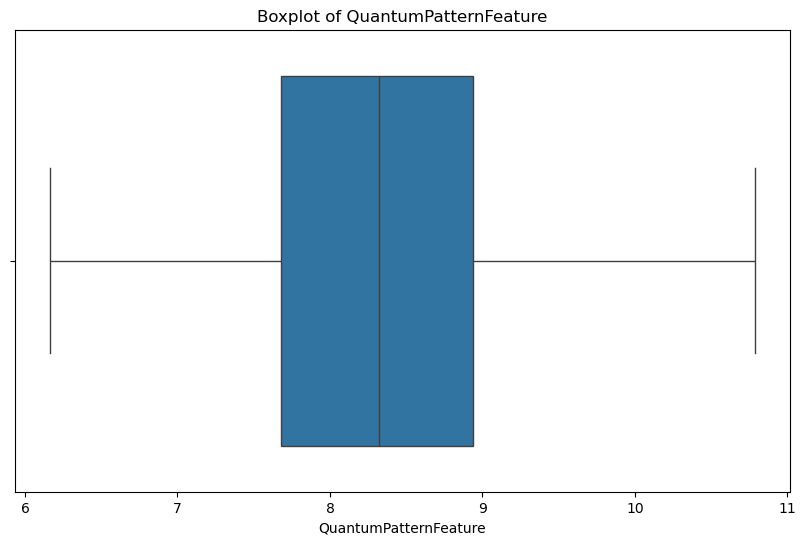

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['QuantumPatternFeature'])
plt.title('Boxplot of QuantumPatternFeature')
plt.xlabel('QuantumPatternFeature')
plt.show()

**Вывод:** Имеем дело с чистыми данными - без выбросов и аномалий. Подтвердили это на боксплотах.

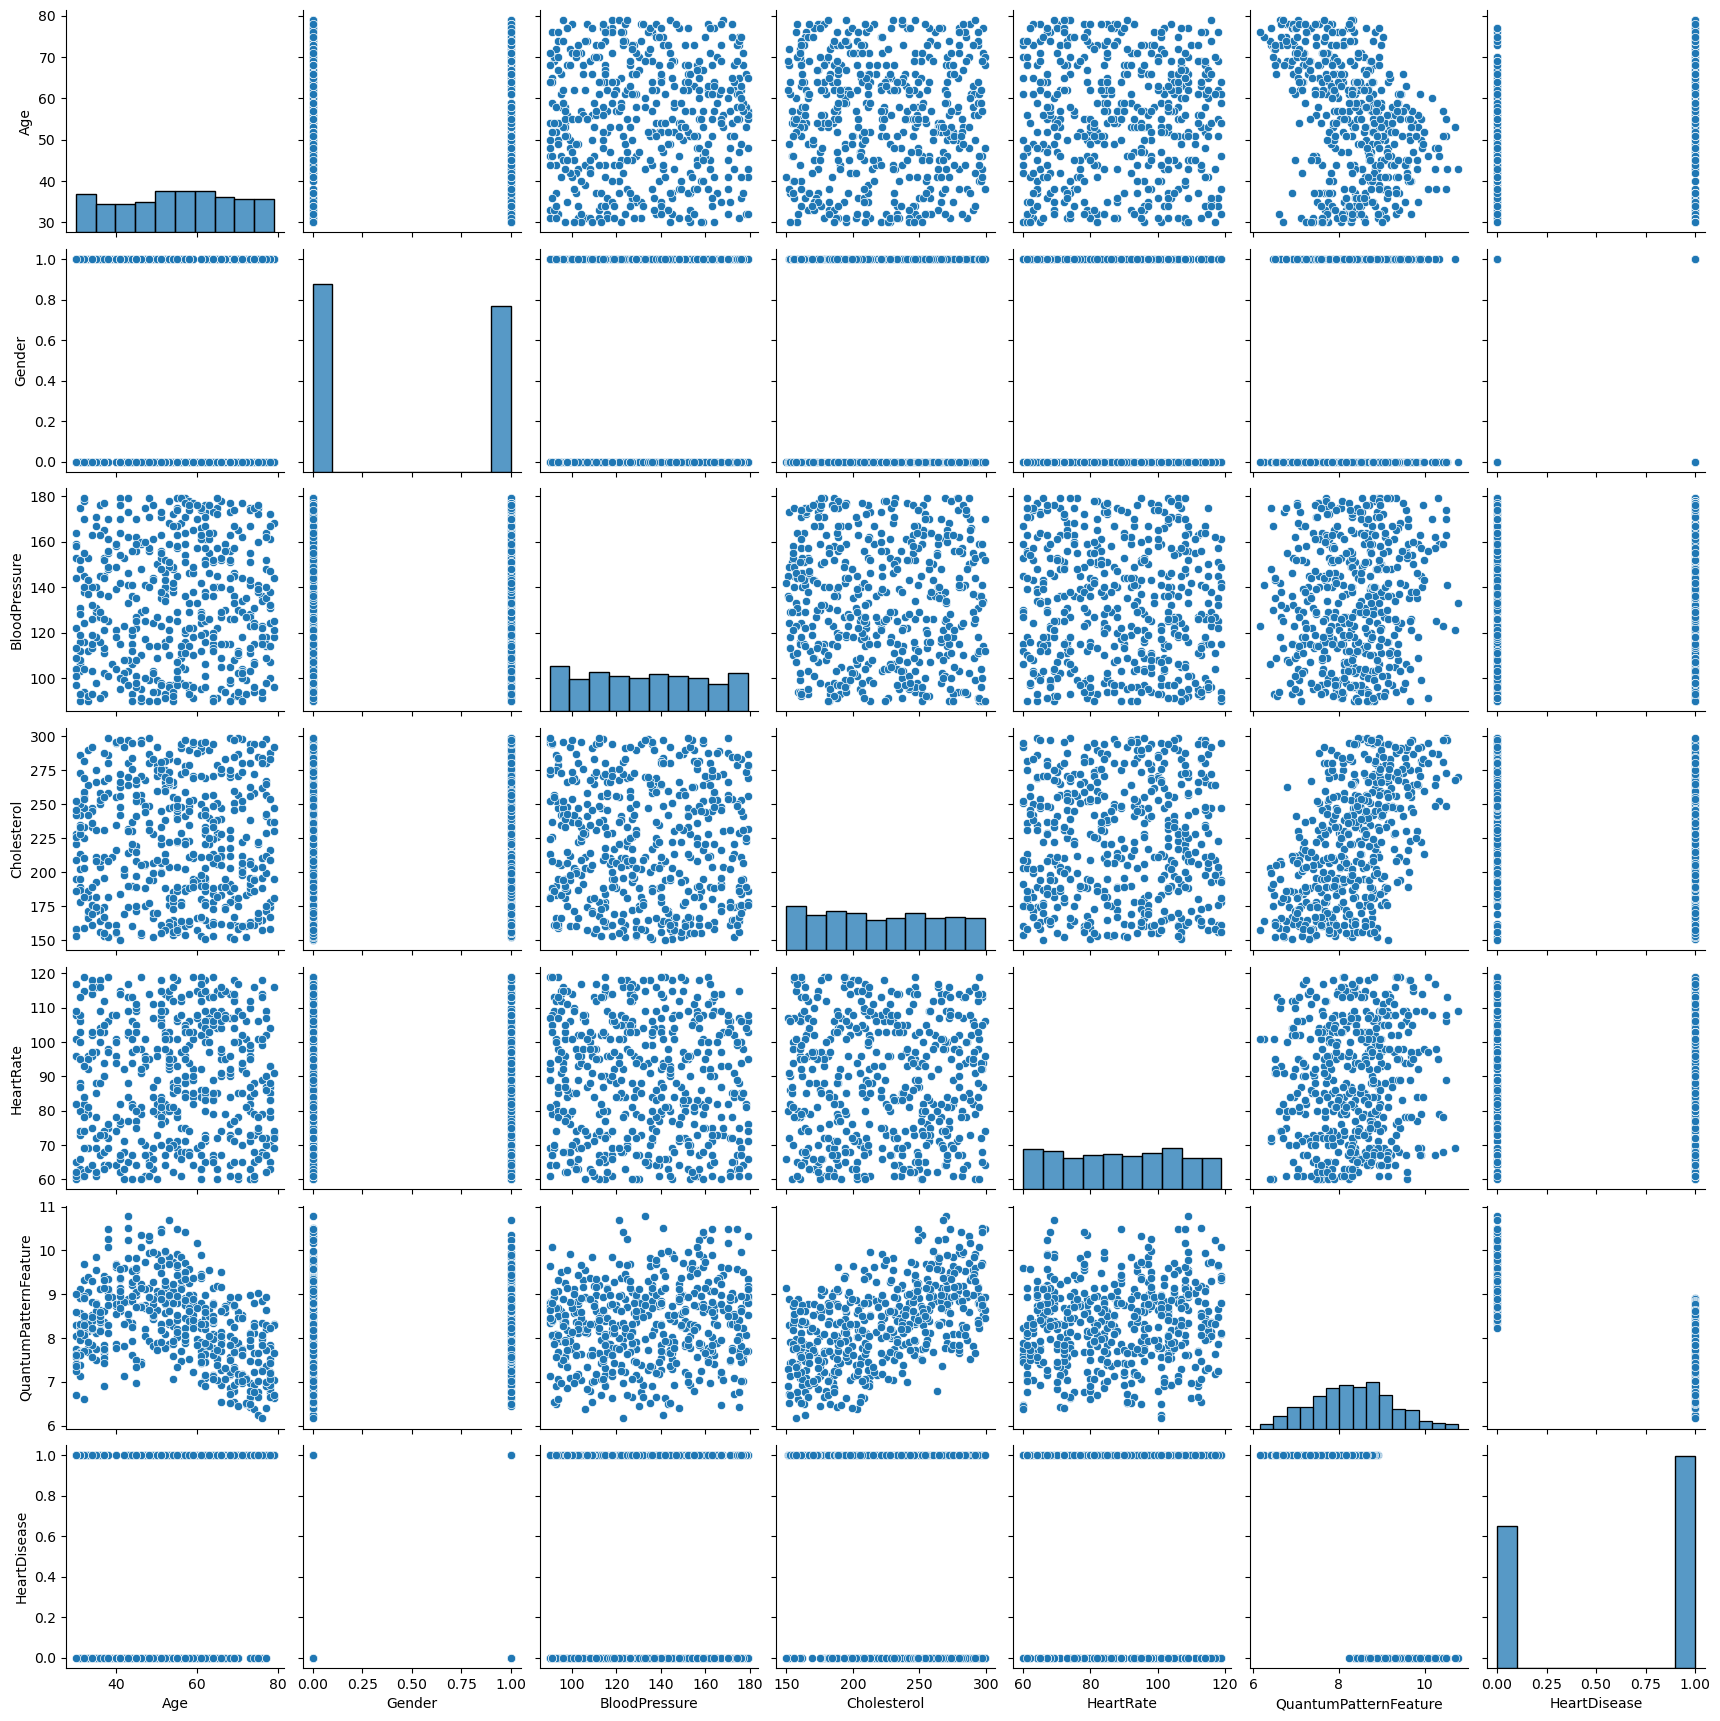

In [9]:
col = ['Age','Gender', 'BloodPressure', 'Cholesterol', 'HeartRate', 'QuantumPatternFeature', 'HeartDisease']
sns.pairplot(df.loc[:,col])

**Вывод:** Данные распределены скорее равномерно, чем нормально. Последний признак похож на нормальное распределение.

In [10]:
df[col].corr(method='pearson')

,Age,Gender,BloodPressure,Cholesterol,HeartRate,QuantumPatternFeature,HeartDisease
Age,1.000000,-0.017147,0.031548,-0.014161,0.023712,-0.378599,0.258298
Gender,-0.017147,1.000000,-0.039109,0.025246,-0.010883,0.010276,-0.011454
BloodPressure,0.031548,-0.039109,1.000000,-0.037793,-0.070828,0.105652,-0.116973
Cholesterol,-0.014161,0.025246,-0.037793,1.000000,0.014156,0.549047,-0.423530
HeartRate,0.023712,-0.010883,-0.070828,0.014156,1.000000,0.113533,-0.102720
QuantumPatternFeature,-0.378599,0.010276,0.105652,0.549047,0.113533,1.000000,-0.775160
HeartDisease,0.258298,-0.011454,-0.116973,-0.423530,-0.102720,-0.775160,1.000000


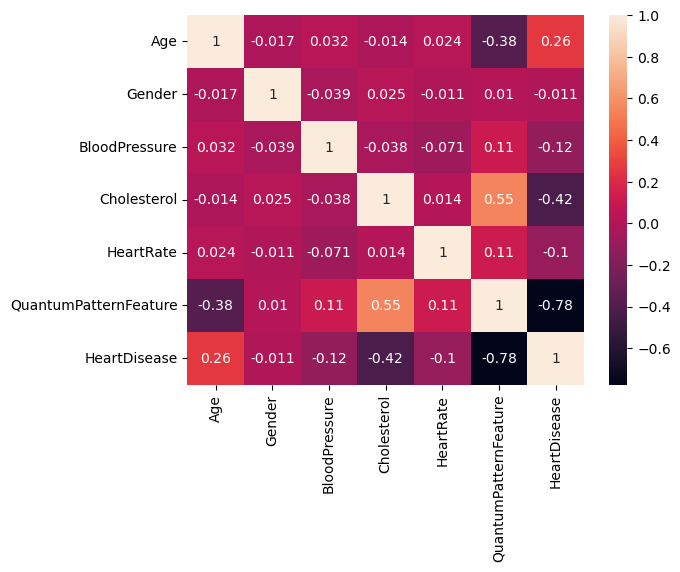

In [11]:
sns.heatmap(df[col].corr(),annot=True);

Видим несильную корреляцию признаков с целевой переменной. Максимальная и хорошая корреляция с QuantumPatternFeature

В данном датасете предсказываем наличие заболевания сердца, поэтому целевой признак: HeartDisease

In [12]:
y = df['HeartDisease']

In [13]:
y.value_counts()

HeartDisease
1    300
0    200
Name: count, dtype: int64

In [14]:
X = df.drop('HeartDisease', axis=1)

**Разбиваем на тестовую и обучающую выборки**

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train1, X_test1, y_train1, y_test1=X_train, X_test, y_train, y_test
X_train2, X_test2, y_train2, y_test2=X_train, X_test, y_train, y_test
X_train3, X_test3, y_train3, y_test3=X_train, X_test, y_train, y_test

**Обучим модель дерева решений.**
**Дерево решений** — это модель машинного обучения, которая используется для классификации и регрессии. Оно представляет собой структуру, похожую на дерево, где:*  Корневой узел (root node) — начальный узел, содержащий весь набор данных
* • Внутренние узлы (decision nodes) — узлы, где происходит разбиение данных по определенному признак
* 
• Листья (leaf nodes) — конечные узлы, содержащие итоговый результат (класс или численное значени
* 
• Ветви (branches) — пути от узлов к потомкам, соответствующие условиям разбиения.

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

param_grid = {
    'max_depth': [3, 4, 5, 6, 8, 10, 12]  # Возможные значения для максимальной глубины
}

# Построение дерева решений
dectree = DecisionTreeClassifier(random_state=21)
# Создание GridSearchCV
grid_search = GridSearchCV(estimator=dectree, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
# Обучение на обучающей выборке
best_dectree = grid_search.best_estimator_
y_train_pred = best_dectree.predict(X_train)
y_test_pred = best_dectree.predict(X_test)

Best Parameters: {'max_depth': 3}


In [17]:
# Расчет метрик качества
QualityMetrics = ['Accuracy train', 'Accuracy test', 'Precision train', 'Precision test', 
                'Recall train', 'Recall test', 'F1 Score train', 'F1 Score test', 
                'ROC AUC train', 'ROC AUC test']

Models = pd.DataFrame(index=QualityMetrics)

Models['DecisionTree'] = [
    accuracy_score(y_train, y_train_pred),
    accuracy_score(y_test, y_test_pred),
    precision_score(y_train, y_train_pred, average='weighted'),
    precision_score(y_test, y_test_pred, average='weighted'),
    recall_score(y_train, y_train_pred, average='weighted'),
    recall_score(y_test, y_test_pred, average='weighted'),
    f1_score(y_train, y_train_pred, average='weighted'), 
    f1_score(y_test, y_test_pred, average='weighted'),
    roc_auc_score(y_train, y_train_pred), 
    roc_auc_score(y_test, y_test_pred)
]

Models

,DecisionTree
Accuracy train,0.941333
Accuracy test,0.920000
Precision train,0.947702
Precision test,0.928793
Recall train,0.941333
Recall test,0.920000
F1 Score train,0.941820
F1 Score test,0.920623
ROC AUC train,0.950184
ROC AUC test,0.929385


In [18]:
# Вычисление матрицы ошибок
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
conf_matrix_train_df = pd.DataFrame(conf_matrix_train)
conf_matrix_test_df = pd.DataFrame(conf_matrix_test)
# Вывод матриц ошибок

print("\nConfusion Matrix (Train):")
print(conf_matrix_train_df)
print("\nConfusion Matrix (Test):")
print(conf_matrix_test_df)


Confusion Matrix (Train):
     0    1
0  148    1
1   21  205

Confusion Matrix (Test):
    0   1
0  50   1
1   9  65


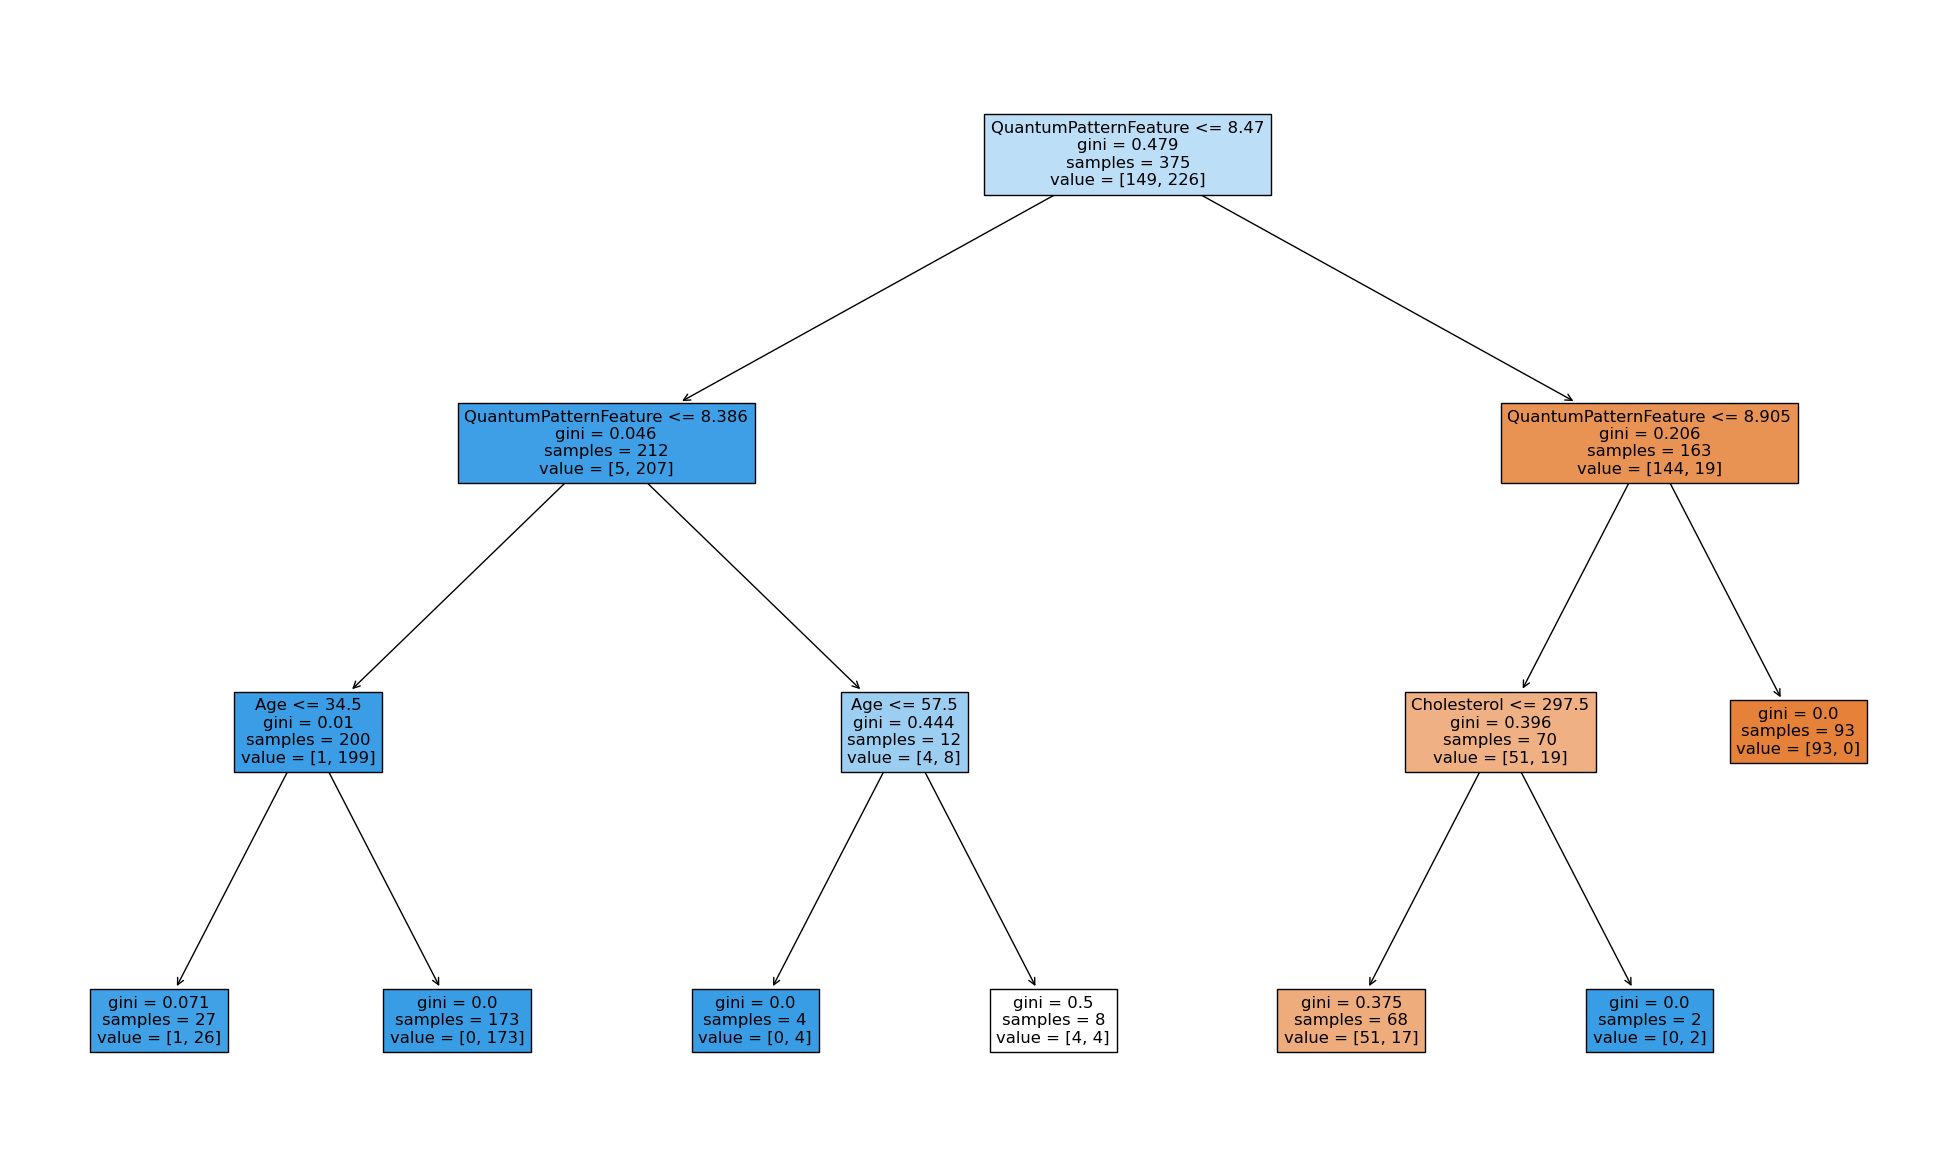

In [19]:
from sklearn.tree import plot_tree
plt.figure(figsize=((25,15)))
plot_tree(best_dectree, 
          filled=True,
          feature_names=X.columns)
plt.show()

**Выводы:** Модель получилась в принципе хорошая.
Попробуем обучить модель ансамблевыми методами.
**Бэггинг**(параллельное обучение)
    Обучает несколько моделей на разных подвыборках данных.
    Итоговый ответ — усреднение (регрессия) / голосование (классификация). Пример: Random Forest.

In [20]:
from sklearn.model_selection import GridSearchCV

# Определение параметров для поиска с увеличенным количеством значений
param_grid = {
    'n_estimators': [10, 50, 100, 150, 200],  # Значений для количества деревьев
    'max_depth': [ 5, 10, 15],  # Значений для максимальной глубины
    'min_samples_split': [2, 5, 10],  # Минимальное число samples для разделения узла
    'min_samples_leaf': [1, 2, 4]     # Минимальное число samples в листе
}

# Создание GridSearchCV
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Поиск наилучших параметров
grid_search.fit(X_train1, y_train1)

# Вывод наилучших параметров и оценки
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Использование наилучшей модели для предсказаний
best_rfc = grid_search.best_estimator_
rfc_train_pred = best_rfc.predict(X_train1)
rfc_test_pred = best_rfc.predict(X_test1)

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 10}
Best Accuracy: 0.9253333333333333


In [21]:
Models['RandomForest'] = [
    accuracy_score(y_train1, rfc_train_pred),
    accuracy_score(y_test1, rfc_test_pred),
    precision_score(y_train1, rfc_train_pred, average='weighted'),
    precision_score(y_test1, rfc_test_pred, average='weighted'),
    recall_score(y_train1, rfc_train_pred, average='weighted'),
    recall_score(y_test1, rfc_test_pred, average='weighted'),
    f1_score(y_train1, rfc_train_pred, average='weighted'), 
    f1_score(y_test1, rfc_test_pred, average='weighted'),
    roc_auc_score(y_train1, rfc_train_pred), 
    roc_auc_score(y_test1, rfc_test_pred)
]
Models

,DecisionTree,RandomForest
Accuracy train,0.941333,0.965333
Accuracy test,0.920000,0.920000
Precision train,0.947702,0.967397
Precision test,0.928793,0.925325
Recall train,0.941333,0.965333
Recall test,0.920000,0.920000
F1 Score train,0.941820,0.965518
F1 Score test,0.920623,0.920532
ROC AUC train,0.950184,0.970096
ROC AUC test,0.929385,0.926338


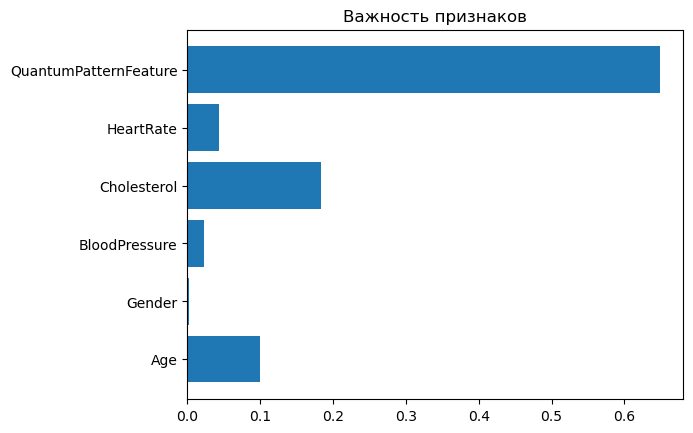

In [22]:
importances = best_rfc.feature_importances_
plt.barh(X_train1.columns, importances)
plt.title("Важность признаков")
plt.show()

In [23]:
conf_matrix_train = confusion_matrix(y_train1, rfc_train_pred)
conf_matrix_test = confusion_matrix(y_test1, rfc_test_pred)
conf_matrix_train_df = pd.DataFrame(conf_matrix_train)
conf_matrix_test_df = pd.DataFrame(conf_matrix_test)
# Вывод матриц ошибок

print("\nConfusion Matrix (Train):")
print(conf_matrix_train_df)
print("\nConfusion Matrix (Test):")
print(conf_matrix_test_df)


Confusion Matrix (Train):
     0    1
0  148    1
1   12  214

Confusion Matrix (Test):
    0   1
0  49   2
1   8  66


Используем также ансамблевый метод бустинга(последовательное обучение).
**XGBoost**

In [42]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB 330.3 kB/s eta 0:07:34
   ---------------------------------------- 0.1/150.0 MB 653.6 kB/s eta 0:03:50
   ---------------------------------------- 0.2/150.0 MB 1.1 MB/s eta 0:02:18
   ---------------------------------------- 0.3/150.0 MB 1.7 MB/s eta 0:01:29
   ---------------------------------------- 0.6/150.0 MB 2.6 MB/s eta 0:00:57
   ---------------------------------------- 1.1/150.0 MB 4.0 MB/s eta 0:00:38
    --------------------------------------- 2.1/150.0 MB 6.2 MB/s eta 0:00:24
    --------------------------------------- 2.4/150.0 MB 6.4 MB/s eta 0:00:23
    --------------------------------------- 3.7/150.0 MB 8.7 MB/s eta 0:00:17
   - -------------------------------------- 4.9/150.0 MB 10.4 MB/s eta 0:00:14
   - -------------------------------------- 6.0/150.0 MB 11.6 MB/s

In [28]:
import xgboost as xgb
from xgboost import XGBClassifier
from scipy.stats import randint, uniform

# Базовые параметры
xgb_model = XGBClassifier(random_state=21, n_jobs=-1)

# Диапазоны параметров для RandomizedSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],  # Количество деревьев
    'max_depth': [3, 5, 7],          # Глубина дерева
    'learning_rate': [0.01, 0.1, 0.2],  # Скорость обучения
    'subsample': [0.8, 1.0],         # Доля данных для каждого дерева
    'colsample_bytree': [0.8, 1.0],  # Доля признаков для каждого дерева
    'gamma': [0, 0.1, 0.2],          # Минимальное уменьшение loss для разделения
    'reg_alpha': [1],      # L1-регуляризация
    'reg_lambda': [10]      # L2-регуляризация
}

grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=5,  # Кросс-валидация (5 фолдов)
    scoring='accuracy',  
    n_jobs=-1,  # Использовать все ядра CPU
    verbose=1   # Вывод лога
)
grid_search.fit(X_train2, y_train2)
# Лучшие параметры и модель
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Предсказание на тестовых данных
best_xgb = grid_search.best_estimator_
xgb_train_pred = best_xgb.predict(X_train2)
xgb_test_pred = best_xgb.predict(X_test2)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150, 'reg_alpha': 1, 'reg_lambda': 10, 'subsample': 0.8}
Best Accuracy: 0.9280000000000002


In [29]:
Models['XGBoost'] = [
    accuracy_score(y_train2, xgb_train_pred),
    accuracy_score(y_test2, xgb_test_pred),
    precision_score(y_train2, xgb_train_pred, average='weighted'),
    precision_score(y_test2, xgb_test_pred, average='weighted'),
    recall_score(y_train2, xgb_train_pred, average='weighted'),
    recall_score(y_test2, xgb_test_pred, average='weighted'),
    f1_score(y_train2, xgb_train_pred, average='weighted'), 
    f1_score(y_test2, xgb_test_pred, average='weighted'),
    roc_auc_score(y_train2, xgb_train_pred), 
    roc_auc_score(y_test2, xgb_test_pred)
]
Models

,DecisionTree,RandomForest,XGBoost
Accuracy train,0.941333,0.965333,0.957333
Accuracy test,0.920000,0.920000,0.912000
Precision train,0.947702,0.967397,0.958105
Precision test,0.928793,0.925325,0.919018
Recall train,0.941333,0.965333,0.957333
Recall test,0.920000,0.920000,0.912000
F1 Score train,0.941820,0.965518,0.957467
F1 Score test,0.920623,0.920532,0.912641
ROC AUC train,0.950184,0.970096,0.958885
ROC AUC test,0.929385,0.926338,0.919581


**Вывод:** В целом все модели приблизительно одинаковы, но Decision Tree показывает на метриках чуть лучшие значения.